In [58]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [59]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Alcohol_Sales.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

Saving Alcohol_Sales.csv to Alcohol_Sales (1).csv


In [60]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [61]:
df.columns = ['Sales']

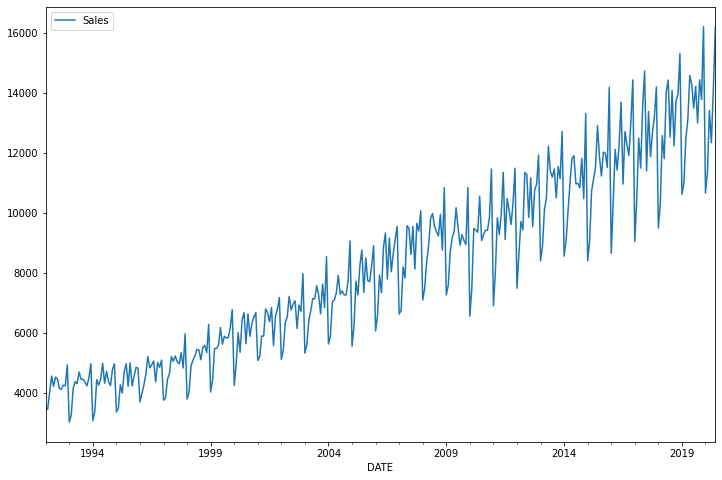

In [62]:
df.plot(figsize=(12,8))

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose

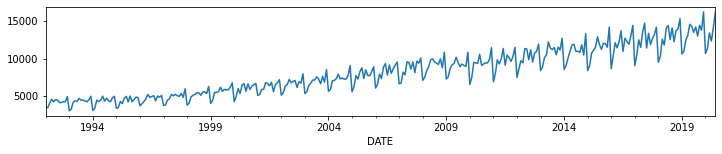

In [64]:
results = seasonal_decompose(df['Sales'])
results.observed.plot(figsize=(12,2))

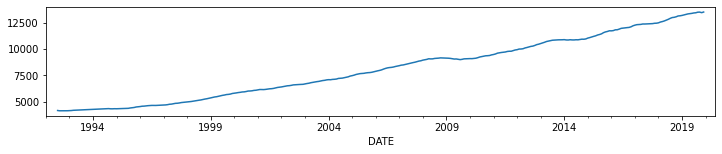

In [65]:
results.trend.plot(figsize=(12,2))

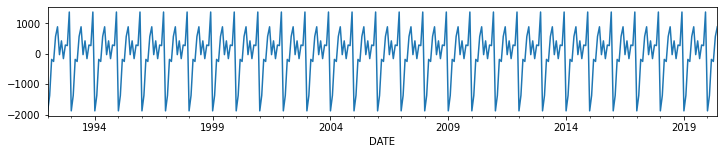

In [66]:
results.seasonal.plot(figsize=(12,2))

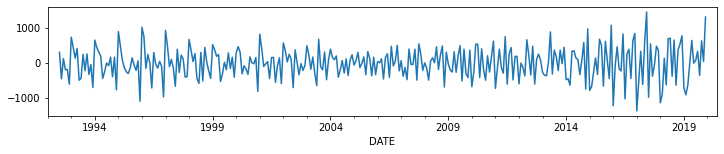

In [67]:
results.resid.plot(figsize=(12,2))

## Train Test Split

In [68]:
len(df)

342

In [69]:
325-12

313

In [70]:
train = df.iloc[:313]
test = df.iloc[313:]

In [71]:
len(test)

29

## Scale Data

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
scaler = MinMaxScaler()

In [74]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [75]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [76]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [77]:
scaled_train

array([[0.03662502],
       [0.03653945],
       [0.08309088],
       [0.13118261],
       [0.10183125],
       [0.12818757],
       [0.12279651],
       [0.09464316],
       [0.09370187],
       [0.10508301],
       [0.10345713],
       [0.16301557],
       [0.        ],
       [0.01968167],
       [0.09661133],
       [0.11518056],
       [0.10919048],
       [0.14247818],
       [0.12211193],
       [0.12202636],
       [0.11406812],
       [0.10311484],
       [0.12570597],
       [0.16626733],
       [0.00376519],
       [0.02960808],
       [0.12082834],
       [0.10525415],
       [0.12228307],
       [0.16720863],
       [0.11064522],
       [0.14444635],
       [0.11492384],
       [0.10414171],
       [0.15000856],
       [0.16601061],
       [0.02900907],
       [0.03876433],
       [0.10593873],
       [0.0824063 ],
       [0.14410406],
       [0.16626733],
       [0.1020024 ],
       [0.16849221],
       [0.10302927],
       [0.13032689],
       [0.15574191],
       [0.153

In [78]:
# define generator
n_input = 2
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [79]:
len(scaled_train)

313

In [80]:
len(generator) # n_input = 2

311

In [81]:
scaled_train

array([[0.03662502],
       [0.03653945],
       [0.08309088],
       [0.13118261],
       [0.10183125],
       [0.12818757],
       [0.12279651],
       [0.09464316],
       [0.09370187],
       [0.10508301],
       [0.10345713],
       [0.16301557],
       [0.        ],
       [0.01968167],
       [0.09661133],
       [0.11518056],
       [0.10919048],
       [0.14247818],
       [0.12211193],
       [0.12202636],
       [0.11406812],
       [0.10311484],
       [0.12570597],
       [0.16626733],
       [0.00376519],
       [0.02960808],
       [0.12082834],
       [0.10525415],
       [0.12228307],
       [0.16720863],
       [0.11064522],
       [0.14444635],
       [0.11492384],
       [0.10414171],
       [0.15000856],
       [0.16601061],
       [0.02900907],
       [0.03876433],
       [0.10593873],
       [0.0824063 ],
       [0.14410406],
       [0.16626733],
       [0.1020024 ],
       [0.16849221],
       [0.10302927],
       [0.13032689],
       [0.15574191],
       [0.153

In [82]:
# What does the first batch look like?
X,y = generator[0]

In [83]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03662502 0.03653945]
Predict this y: 
 [[0.08309088]]


In [84]:
# Let's redefine to get 12 months back and then predict the next month out
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [85]:
# What does the first batch look like?
X,y = generator[0]

In [86]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03662502 0.03653945 0.08309088 0.13118261 0.10183125 0.12818757
 0.12279651 0.09464316 0.09370187 0.10508301 0.10345713 0.16301557]
Predict this y: 
 [[0.]]


### Create the Model

In [87]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [88]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [89]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [90]:
# fit model
model.fit_generator(generator,epochs=50)

Epoch 1/50
301/301 [==============================] - 1s 5ms/step - loss: 0.0202
Epoch 2/50
301/301 [==============================] - 1s 5ms/step - loss: 0.0089
Epoch 3/50
301/301 [==============================] - 1s 5ms/step - loss: 0.0089
Epoch 4/50
301/301 [==============================] - 1s 5ms/step - loss: 0.0082
Epoch 5/50
301/301 [==============================] - 1s 5ms/step - loss: 0.0075
Epoch 6/50
301/301 [==============================] - 1s 5ms/step - loss: 0.0068
Epoch 7/50
301/301 [==============================] - 1s 5ms/step - loss: 0.0059
Epoch 8/50
301/301 [==============================] - 1s 5ms/step - loss: 0.0050
Epoch 9/50
301/301 [==============================] - 1s 5ms/step - loss: 0.0035
Epoch 10/50
301/301 [==============================] - 1s 5ms/step - loss: 0.0036
Epoch 11/50
301/301 [==============================] - 1s 5ms/step - loss: 0.0034
Epoch 12/50
301/301 [==============================] - 1s 5ms/step - loss: 0.0026
Epoch 13/50
301/301 [====

In [91]:
model.history.history.keys()

dict_keys(['loss'])

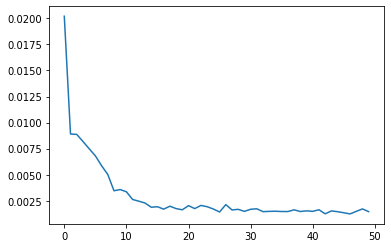

In [92]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

## Evaluate on Test Data

In [93]:
first_eval_batch = scaled_train[-12:]

In [94]:
first_eval_batch

array([[0.63511895],
       [0.80865993],
       [0.72377203],
       [0.89902447],
       [1.        ],
       [0.71572822],
       [0.88499059],
       [0.75646072],
       [0.82423413],
       [0.87035769],
       [0.95498888],
       [0.55296937]])

In [95]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [96]:
model.predict(first_eval_batch)

array([[0.7176344]], dtype=float32)

In [97]:
scaled_test[0]

array([0.62450796])

Now let's put this logic in a for loop to predict into the future for the entire test range.

----

In [98]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

In [99]:
current_batch.shape

(1, 12, 1)

In [100]:
current_batch

array([[[0.63511895],
        [0.80865993],
        [0.72377203],
        [0.89902447],
        [1.        ],
        [0.71572822],
        [0.88499059],
        [0.75646072],
        [0.82423413],
        [0.87035769],
        [0.95498888],
        [0.55296937]]])

In [101]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[ 0.80865993],
        [ 0.72377203],
        [ 0.89902447],
        [ 1.        ],
        [ 0.71572822],
        [ 0.88499059],
        [ 0.75646072],
        [ 0.82423413],
        [ 0.87035769],
        [ 0.95498888],
        [ 0.55296937],
        [99.        ]]])

**NOTE: PAY CLOSE ATTENTION HERE TO WHAT IS BEING OUTPUTED AND IN WHAT DIMENSIONS. ADD YOUR OWN PRINT() STATEMENTS TO SEE WHAT IS TRULY GOING ON!!**

In [102]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [103]:
test_predictions

[array([0.7176344], dtype=float32),
 array([0.8084812], dtype=float32),
 array([0.7939329], dtype=float32),
 array([0.9546945], dtype=float32),
 array([1.0017614], dtype=float32),
 array([0.77095425], dtype=float32),
 array([0.9017471], dtype=float32),
 array([0.781868], dtype=float32),
 array([0.86657214], dtype=float32),
 array([0.9083061], dtype=float32),
 array([0.96044767], dtype=float32),
 array([0.60867083], dtype=float32),
 array([0.77404106], dtype=float32),
 array([0.8223505], dtype=float32),
 array([0.8635758], dtype=float32),
 array([0.9950515], dtype=float32),
 array([1.0034798], dtype=float32),
 array([0.81333447], dtype=float32),
 array([0.9167365], dtype=float32),
 array([0.8129114], dtype=float32),
 array([0.9099215], dtype=float32),
 array([0.9387727], dtype=float32),
 array([0.96523935], dtype=float32),
 array([0.6642504], dtype=float32),
 array([0.82199585], dtype=float32),
 array([0.8483804], dtype=float32),
 array([0.9261631], dtype=float32),
 array([1.0236415], d

In [104]:
scaled_test

array([[0.62450796],
       [0.81619031],
       [0.75081294],
       [0.9396714 ],
       [0.97458497],
       [0.81182612],
       [0.94489132],
       [0.78726681],
       [0.91528324],
       [0.93428034],
       [1.05057334],
       [0.64906726],
       [0.67987335],
       [0.80788978],
       [0.86145816],
       [0.98767756],
       [0.96234811],
       [0.89448913],
       [0.95618689],
       [0.85238747],
       [0.97518398],
       [0.91921958],
       [1.12664727],
       [0.65274688],
       [0.71187746],
       [0.88815677],
       [0.79608078],
       [0.94814308],
       [1.12527811]])

## Inverse Transformations and Compare

In [105]:
true_predictions = scaler.inverse_transform(test_predictions)

In [106]:
true_predictions

array([[11417.27536309],
       [12478.91149521],
       [12308.90004158],
       [14187.56003809],
       [14737.5841465 ],
       [12040.37138057],
       [13568.81669831],
       [12167.90922546],
       [13157.76204729],
       [13645.46533966],
       [14254.79146028],
       [10143.92732787],
       [12076.44378781],
       [12640.98796654],
       [13122.74698758],
       [14659.17186618],
       [14757.66539121],
       [12535.6265583 ],
       [13743.98254704],
       [12530.68251824],
       [13664.34296346],
       [14001.49751949],
       [14310.78699768],
       [10793.4298687 ],
       [12636.84355426],
       [12945.17320049],
       [13854.14172196],
       [14993.27418447],
       [14782.35772991]])

In [107]:
test

,Sales
DATE,
2018-02-01,10329
2018-03-01,12569
2018-04-01,11805
2018-05-01,14012
2018-06-01,14420
2018-07-01,12518
2018-08-01,14073
2018-09-01,12231
2018-10-01,13727


In [108]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [109]:
test

,Sales,Predictions
DATE,,
2018-02-01,10329,11417.275363
2018-03-01,12569,12478.911495
2018-04-01,11805,12308.900042
2018-05-01,14012,14187.560038
2018-06-01,14420,14737.584146
2018-07-01,12518,12040.371381
2018-08-01,14073,13568.816698
2018-09-01,12231,12167.909225
2018-10-01,13727,13157.762047


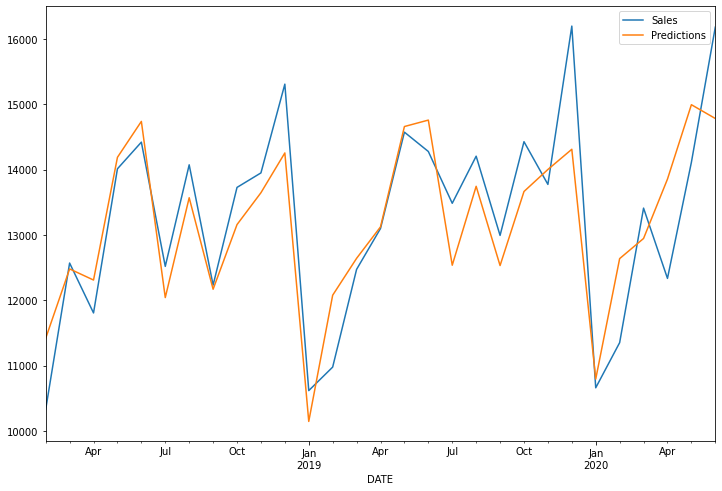

In [110]:
test.plot(figsize=(12,8))

# Saving and Loading Models

In [111]:
model.save('my_rnn_model.h5')

## load a model

In [112]:
from keras.models import load_model
new_model = load_model('my_rnn_model.h5')

In [113]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
